#  Pre-workshop: Installing required libraries

# Step 1: Import important libraries

In [1]:
import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install nltk
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install sklearn
!{sys.executable} -m pip install scikit-learn
!{sys.executable} -m pip install plotly
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install WordCloud
!{sys.executable} -m pip install TextBlob
!python -m textblob.download_corpora


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [54]:
#utilities
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import csv
import string
import json
import requests
from datetime import datetime
#text processing & sentiment analysis
import re
import sklearn.metrics
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer # devide the words 

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from wordcloud import WordCloud
import unicodedata as ud
from nltk.stem.isri import ISRIStemmer
import time
#model
from textblob import TextBlob
from sklearn.metrics import classification_report, accuracy_score
from sklearn.naive_bayes import MultinomialNB
%matplotlib inline


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
# change the seeting of the cells to show the entire content of coulmn ( eexpand the size of coulmn)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  after removing the cwd from sys.path.


In [6]:
# Mounting Google Drive
from google.colab import drive  # to mount Google Drive to Colab notebook
drive.mount('/content/gdrive')

#path = './gdrive/My Drive/SharedFolder/Data_and_Code/'
path = './gdrive/My Drive/cloud project /'

Mounted at /content/gdrive


In [7]:
!pwd

/content


In [8]:
# read csv file and save it in a data frame
data_df=pd.read_csv(path+'mobilyTweetsSentimentAnalysisAfterManual.csv')  

In [9]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


# Step 2: Explore that data

In [10]:
# how much data do I have?
len(data_df)

4707

In [11]:
# How about if I want to see part of the data?
data_df.head(70)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,tweetID,tweetText,tweetRetweetCt,tweetFavoriteCt,tweetSource,tweetCreated,userID,userScreen,userName,userCreateDt,clean text,text length,Sentiment Analysis,pos_count,neg_count
0,0,0,7,1500041333347659779,"@DolezalekJosef @DrabovaDana Povodně v centru Prahy - centrum bez elektřiny, mobily jsme nabíjeli ve středisku v ZŠ na Uhelném trhu. Jistě, FVE je mnohem výhodnější - ale lidi si je musí pořídit za svý nebo na půjčku.",0.00000,0.00000,Twitter Web App,2022-03-05 09:31:37+00:00,4090104555.00000,BathoryBetka,bětka.báthory,2015-11-01 13:32:01+00:00,Povodně elektř nabí stř ZŠ Uhelné Jistě výhodnější musí poří svý půjč,93,neutral,0,0
1,1,1,12,1500038278451544064,"@calmounique مرحباً..أستاذي الكريم \n\nالآن جهاز Samsung S22 Ultra متاح للطلب المسبق عبر متجرنا الإلكتروني مع هدايا قيمة تصل قيمتها إلى 2,199 ريال.\n \nللطلب المسبق يرجى الضغط على الرابط:\nhttps://t.co/n6NgJ9xOB1\n\nنسعد بخدمتك",0.00000,0.00000,Sprinklr Publishing,2022-03-05 09:19:29+00:00,116666827.00000,Mobily1100,رعاية العملاء,2010-02-23 06:49:32+00:00,مرحبا استاذي الكريم جهاز S22 متاح للطلب المسبق عبر متجرنا الالكتروني هدايا قيمه تصل قيمتها 199 للطلب المسبق يرجي الضغط الرابط نسعد بخدمتك,139,neutral,0,0
2,2,2,14,1500032695585456129,@PetrNov95968147 Přišlo mi taky a ještě chtějí donést mobily.,0.00000,0.00000,Twitter for Android,2022-03-05 08:57:18+00:00,1317828949867712512.00000,HladkaIrena,Irena😜🐬🌸🍀,2020-10-18 14:06:19+00:00,Přiš ještě chtějí doné,25,neutral,0,0
3,3,3,25,1500006943250857984,@madgirl629 اهلاً و سهلاً\n\nللتغيير الموقع للفايبر مجاناً لاول مرة وبعدها يتم تحصيل 690 شامل الضريبة يرجى التحقق اولاً من وجود التغطية في الموقع الجديد بزيارة https://t.co/nzU30MT1Tu والتأكد من وجود البوكسية مركبة في حال وجود الشرطين يمكنك زيارة الفرع لطلب نقل الخدمة\n\nنسعد بتواصلك,0.00000,0.00000,Sprinklr Publishing,2022-03-05 07:14:58+00:00,116666827.00000,Mobily1100,رعاية العملاء,2010-02-23 06:49:32+00:00,اهلا سهلا للتغيير الموقع للفايبر مجانا لاول مره وبعدها يتم تحصيل 690 شامل الضريبه يرجي التحقق اولا وجود التغطيه الموقع الجديد بزياره والتاكد وجود البوكسيه مركبه حال وجود الشرطين يمكنك الفرع لطلب نقل الخدمه نسعد بتواصلك,218,neutral,0,0
4,4,4,33,1499974365668069377,Na toto se čekalo. Rusko prý přijde o nové Samsung mobily a další zařízení - https://t.co/X4VrbtCSMF https://t.co/aFKvcpaq9T,0.00000,5.00000,Svět Androida autoposts,2022-03-05 05:05:31+00:00,18540811.00000,SvetAndroida,Svět Androida cz,2009-01-02 00:52:05+00:00,č prý př nové další zařízení,37,neutral,0,0
5,5,5,38,1499962439659626504,@esai123423 اختيار نوع الجهاز المستخدم (موبايل او راوتر)\nشرح الشكوى بإختصار\nتحديد المشكلة (خارج المبنى او داخله)\nاختيار اسم المنطقة واسم المدينة\nالضغط على العنوان لإظهار الخريطة وتحديد إحداثيات موقعك\nولتحميل تطبيق موبايلي زيارة https://t.co/SJdIwkF5m6 . نحن هنا لخدمتكم,0.00000,0.00000,Sprinklr Publishing,2022-03-05 04:18:08+00:00,116666827.00000,Mobily1100,رعاية العملاء,2010-02-23 06:49:32+00:00,اختيار نوع الجهاز المستخدم موبايل راوتر شرح الشكوي باختصار تحديد المشكله خارج المبني داخله اختيار اسم المنطقه واسم المدينه الضغط العنوان لاظهار الخريطه وتحديد احداثيات موقعك ولتحميل تطبيق لخدمتكم,195,neutral,0,1
6,6,6,41,1499952269864939522,@ohzm66 اهلا وسهلا للتحقق من المديونيات المستحقة على هويتك لدى موبايلي وذلك من خلال الرابط \n https://t.co/lDhd0DminN . نحن هنا لخدمتكم,0.00000,0.00000,Sprinklr Publishing,2022-03-05 03:37:43+00:00,116666827.00000,Mobily1100,رعاية العملاء,2010-02-23 06:49:32+00:00,اهلا وسهلا للتحقق المديونيات المستحقه هويتك وذلك الرابط لخدمتكم,63,neutral,0,0
7,7,7,42,1499945192618663943,@zzaa854 اهلا وسهلا تصدر الفواتير في موبايلي شهريا يوم 1 من كل شهر ميلادي تفضل بإستعراض الفواتير الصادرة من خلال تطبيق موبايلي الخاص بك او من خلال موقع موبايلي https://t.co/r2nBQj4Ue2 . نحن هنا لخدمتكم,0.00000,0.00000,Sprinklr Publishing,2022-03-05 03:09:36+00:00,116666827.00000,Mobily1100,رعاية العملاء,2010-02-23 06:49:32+00:00,اهلا وسهلا تصدر الفواتير شهريا شهر ميلادي تفضل باستعراض الفواتير الصادره تطبيق الخاص موقع لخدمتكم,97,neutral,0,0
8,8,8,44,149

In [12]:
data_df.tail(3)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,tweetID,tweetText,tweetRetweetCt,tweetFavoriteCt,tweetSource,tweetCreated,userID,userScreen,userName,userCreateDt,clean text,text length,Sentiment Analysis,pos_count,neg_count
4704,4704,4704,13421,1500269114346151943,@b1b_5 في حالة استيفاء جميع شروط الاقسام نعم يمكنك الاستفادة من عرض الاقساط\n\nرابط تفاصيل خدمة الاقساط https://t.co/fOLVHUwFac\n\nنحن هنا لخدمتك https://t.co/M7CgWPCKm7,0.00000,1.00000,Sprinklr Publishing,2022-03-06 00:36:45+00:00,116666827.00000,Mobily1100,رعاية العملاء,2010-02-23 06:49:32+00:00,حاله استيفاء شروط الاقسام يمكنك الاستفاده عرض الاقساط رابط تفاصيل خدمه الاقساط لخدمتك,85,neutral,0,0
4705,4705,4705,13422,1500266017083334660,@b1b_5 وللمزيد من التفاصيل عن الاجهزة المتاحة وقيمة القسط الرجاء زيارة الرابط\nhttps://t.co/fOLVHUwFac\n\nنحن هنا لخدمتك https://t.co/M7CgWPCKm7,0.00000,1.00000,Sprinklr Publishing,2022-03-06 00:24:26+00:00,116666827.00000,Mobily1100,رعاية العملاء,2010-02-23 06:49:32+00:00,وللمزيد التفاصيل الاجهزه المتاحه وقيمه القسط الرجاء الرابط لخدمتك,65,neutral,0,0
4706,4706,4706,13423,1500265913219751937,@b1b_5 ولتحميل التطبيق زيارة https://t.co/SJdIwkF5m6\nوفي حالة عدم توفر عروض لابد من زيارة الفرع,0.00000,0.00000,Sprinklr Publishing,2022-03-06 00:24:01+00:00,116666827.00000,Mobily1100,رعاية العملاء,2010-02-23 06:49:32+00:00,ولتحميل التطبيق حاله توفر عروض لابد الفرع,41,neutral,0,0


In [13]:
# Print a concise summary of a DataFrame
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4707 entries, 0 to 4706
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          4707 non-null   int64  
 1   Unnamed: 0.1        4707 non-null   int64  
 2   Unnamed: 0.1.1      4707 non-null   int64  
 3   tweetID             4707 non-null   object 
 4   tweetText           4707 non-null   object 
 5   tweetRetweetCt      4707 non-null   float64
 6   tweetFavoriteCt     4707 non-null   float64
 7   tweetSource         4707 non-null   object 
 8   tweetCreated        4707 non-null   object 
 9   userID              4707 non-null   float64
 10  userScreen          4707 non-null   object 
 11  userName            4699 non-null   object 
 12  userCreateDt        4707 non-null   object 
 13  clean text          4702 non-null   object 
 14  text length         4707 non-null   int64  
 15  Sentiment Analysis  4706 non-null   object 
 16  pos_co

In [14]:
# number of non-NA values
data_df.count()

Unnamed: 0            4707
Unnamed: 0.1          4707
Unnamed: 0.1.1        4707
tweetID               4707
tweetText             4707
tweetRetweetCt        4707
tweetFavoriteCt       4707
tweetSource           4707
tweetCreated          4707
userID                4707
userScreen            4707
userName              4699
userCreateDt          4707
clean text            4702
text length           4707
Sentiment Analysis    4706
pos_count             4707
neg_count             4707
dtype: int64

In [15]:
#Generates descriptive statistics or Summary Statistic of the numeric columns
data_df.describe()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,tweetRetweetCt,tweetFavoriteCt,userID,text length,pos_count,neg_count
count,4707.00000,4707.00000,4707.00000,4707.00000,4707.00000,4707.00000,4707.00000,4707.00000,4707.00000
mean,2353.00000,2353.00000,6318.46505,3.31443,2.32845,758925034974024448.00000,58.20629,0.02401,0.14107
std,1358.93819,1358.93819,3487.51652,67.68371,71.42188,620355999091047296.00000,54.91798,0.17751,0.39663
min,0.00000,0.00000,7.00000,0.00000,0.00000,818995.00000,1.00000,0.00000,0.00000
25%,1176.50000,1176.50000,3617.50000,0.00000,0.00000,1330015810.00000,15.00000,0.00000,0.00000
50%,2353.00000,2353.00000,5894.00000,0.00000,0.00000,1027839665401786368.00000,38.00000,0.00000,0.00000
75%,3529.50000,3529.50000,9264.50000,0.00000,0.00000,1349071748107507712.00000,88.00000,0.00000,0.00000
max,4706.00000,4706.00000,13423.00000,3616.00000,4342.00000,1500534660752891904.00000,263.00000,2.00000,4.00000


Generates descriptive statistics or Summary Statistic of the numeric columns


In [16]:
data_df[['tweetRetweetCt','tweetFavoriteCt']].describe()

,tweetRetweetCt,tweetFavoriteCt
count,4707.00000,4707.00000
mean,3.31443,2.32845
std,67.68371,71.42188
min,0.00000,0.00000
25%,0.00000,0.00000
50%,0.00000,0.00000
75%,0.00000,0.00000
max,3616.00000,4342.00000


In [17]:
# Retrieve list of columns
data_df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'tweetID', 'tweetText',
       'tweetRetweetCt', 'tweetFavoriteCt', 'tweetSource', 'tweetCreated',
       'userID', 'userScreen', 'userName', 'userCreateDt', 'clean text',
       'text length', 'Sentiment Analysis', 'pos_count', 'neg_count'],
      dtype='object')

# Step 3: Clean the data

We need to handel missing data by going through each value and fix errors and missing values

Reasons why data is missing:

    - User forgot to fill in a field.
    - Data was lost while transferring manually from a legacy database.
    - There was a programming error.
    - Users chose not to fill out a field tied to their beliefs about how the results would be used or interpreted.

In [18]:
data_df.isnull().sum()

Unnamed: 0            0
Unnamed: 0.1          0
Unnamed: 0.1.1        0
tweetID               0
tweetText             0
tweetRetweetCt        0
tweetFavoriteCt       0
tweetSource           0
tweetCreated          0
userID                0
userScreen            0
userName              8
userCreateDt          0
clean text            5
text length           0
Sentiment Analysis    1
pos_count             0
neg_count             0
dtype: int64

In [19]:
#remove unnecessary columns - in phase 2 
#data_df.pop('userLocation') 
#data_df.pop('userTimezone')
#data_df.pop('userDesc')

In [20]:
# Retrieve list of columns
data_df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'tweetID', 'tweetText',
       'tweetRetweetCt', 'tweetFavoriteCt', 'tweetSource', 'tweetCreated',
       'userID', 'userScreen', 'userName', 'userCreateDt', 'clean text',
       'text length', 'Sentiment Analysis', 'pos_count', 'neg_count'],
      dtype='object')

Drop duplicates tweets

In [21]:
data_df.drop_duplicates(subset= "tweetText", keep = False, inplace = True)

total tweets after remove duplicates


In [22]:
len(data_df)

4707

In [23]:
# Any missing values?
data_df.isnull().values.any()

True

In [24]:
# Total missing values for each feature
data_df.isnull().sum()

Unnamed: 0            0
Unnamed: 0.1          0
Unnamed: 0.1.1        0
tweetID               0
tweetText             0
tweetRetweetCt        0
tweetFavoriteCt       0
tweetSource           0
tweetCreated          0
userID                0
userScreen            0
userName              8
userCreateDt          0
clean text            5
text length           0
Sentiment Analysis    1
pos_count             0
neg_count             0
dtype: int64

# Step 4: Preprocess the text

First, we build a method that can process each tweet

In [25]:
def normalize_arabic(text):
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ة", "ه", text)
    text = re.sub("گ", "ك", text)
    return text

In [26]:
# remove repeated letters
def remove_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1\1', text)

In [27]:
ar_stops = set(stopwords.words('arabic'))
#remove stop_words
stop_words = {"انا","يتم","الي","الله","عندي","موبايلي","،","","ورحمه","وبركاته","عليكم","السلام","آض","آمينَ","آه","آهاً","آي","أ","أب","أجل","أجمع","أخ","أخذ","أصبح","أضحى","أقبل","أقل","أكثر","ألا","أم","أما","أمامك","أمامكَ","أمسى","أمّا","أن","أنا","أنت","أنتم","أنتما","أنتن","أنتِ","أنشأ","أنّى","أو","أوشك","أولئك","أولئكم","أولاء","أولالك","أوّهْ","أي","أيا","أين","أينما","أيّ","أَنَّ","أََيُّ","أُفٍّ","إذ","إذا","إذاً","إذما","إذن","إلى","إليكم","إليكما","إليكنّ","إليكَ","إلَيْكَ","إلّا","إمّا","إن","إنّما","إي","إياك","إياكم","إياكما","إياكن","إيانا","إياه","إياها","إياهم","إياهما","إياهن","إياي","إيهٍ","إِنَّ","ا","ابتدأ","اثر","اجل","احد","اخرى","اخلولق","اذا","اربعة","ارتدّ","استحال","اطار","اعادة","اعلنت","اف","اكثر","اكد","الألاء","الألى","الا","الاخيرة","الان","الاول","الاولى","التى","التي","الثاني","الثانية","الذاتي","الذى","الذي","الذين","السابق","الف","اللائي","اللاتي","اللتان","اللتيا","اللتين","اللذان","اللذين","اللواتي","الماضي","المقبل","الوقت","الى","اليوم","اما","امام","امس","ان","انبرى","انقلب","انه","انها","او","اول","اي","ايار","ايام","ايضا","ب","بات","باسم","بان","بخٍ","برس","بسبب","بسّ","بشكل","بضع","بطآن","بعد","بعض","بك","بكم","بكما","بكن","بل","بلى","بما","بماذا","بمن","بن","بنا","به","بها","بي","بيد","بين","بَسْ","بَلْهَ","بِئْسَ","تانِ","تانِك","تبدّل","تجاه","تحوّل","تلقاء","تلك","تلكم","تلكما","تم","تينك","تَيْنِ","تِه","تِي","ثلاثة","ثم","ثمّ","ثمّة","ثُمَّ","جعل","جلل","جميع","جير","حار","حاشا","حاليا","حاي","حتى","حرى","حسب","حم","حوالى","حول","حيث","حيثما","حين","حيَّ","حَبَّذَا","حَتَّى","حَذارِ","خلا","خلال","دون","دونك","ذا","ذات","ذاك","ذانك","ذانِ","ذلك","ذلكم","ذلكما","ذلكن","ذو","ذوا","ذواتا","ذواتي","ذيت","ذينك","ذَيْنِ","ذِه","ذِي","راح","رجع","رويدك","ريث","رُبَّ","زيارة","سبحان","سرعان","سنة","سنوات","سوف","سوى","سَاءَ","سَاءَمَا","شبه","شخصا","شرع","شَتَّانَ","صار","صباح","صفر","صهٍ","صهْ","ضمن","طاق","طالما","طفق","طَق","ظلّ","عاد","عام","عاما","عامة","عدا","عدة","عدد","عدم","عسى","عشر","عشرة","علق","على","عليك","عليه","عليها","علًّ","عن","عند","عندما","عوض","عين","عَدَسْ","عَمَّا","غدا","غير","ـ","ف","فان","فلان","فو","فى","في","فيم","فيما","فيه","فيها","قال","قام","قبل","قد","قطّ","قلما","قوة","كأنّما","كأين","كأيّ","كأيّن","كاد","كان","كانت","كذا","كذلك","كرب","كل","كلا","كلاهما","كلتا","كلم","كليكما","كليهما","كلّما","كلَّا","كم","كما","كي","كيت","كيف","كيفما","كَأَنَّ","كِخ","لئن","لا","لات","لاسيما","لدن","لدى","لعمر","لقاء","لك","لكم","لكما","لكن","لكنَّما","لكي","لكيلا","للامم","لم","لما","لمّا","لن","لنا","له","لها","لو","لوكالة","لولا","لوما","لي","لَسْتَ","لَسْتُ","لَسْتُم","لَسْتُمَا","لَسْتُنَّ","لَسْتِ","لَسْنَ","لَعَلَّ","لَكِنَّ","لَيْتَ","لَيْسَ","لَيْسَا","لَيْسَتَا","لَيْسَتْ","لَيْسُوا","لَِسْنَا","ما","ماانفك","مابرح","مادام","ماذا","مازال","مافتئ","مايو","متى","مثل","مذ","مساء","معاذ","مقابل","مكانكم","مكانكما","مكانكنّ","مكانَك","مليار","مليون","مما","ممن","من","منذ","منها","مه","مهما","مَنْ","مِن","نحن","نحو","نعم","نفس","نفسه","نهاية","نَخْ","نِعِمّا","نِعْمَ","ها","هاؤم","هاكَ","هاهنا","هبّ","هذا","هذه","هكذا","هل","هلمَّ","هلّا","هم","هما","هن","هنا","هناك","هنالك","هو","هي","هيا","هيت","هيّا","هَؤلاء","هَاتانِ","هَاتَيْنِ","هَاتِه","هَاتِي","هَجْ","هَذا","هَذانِ","هَذَيْنِ","هَذِه","هَذِي","هَيْهَاتَ","و","و6","وا","واحد","واضاف","واضافت","واكد","وان","واهاً","واوضح","وراءَك","وفي","وقال","وقالت","وقد","وقف","وكان","وكانت","ولا","ولم","ومن","مَن","وهو","وهي","ويكأنّ","وَيْ","وُشْكَانََ","يكون","يمكن","يوم","ّأيّان"}
def remove_stop_words(text):
    zen = TextBlob(text)
    words = zen.words
    return " ".join([w for w in words if not w in ar_stops and not w in stop_words and len(w) >= 2])

In [28]:


#start processing the tweet
def processPost(tweet):

    #Replace @username with empty string
    tweet = re.sub('@[^\s]+', ' ', tweet)
    
    #Convert www.* or https?://* to " "
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',tweet)
    

    # remove anything that's not alphanumeric or underscore
    tweet = re.sub('[/\W+/g]', ' ',  tweet) 
     # remove underscore
    tweet = re.sub('[_]', ' ',  tweet) 
    #tweet= remove_punctuations(tweet)

    # remove repeated letters
    tweet=remove_repeating_char(tweet)

    #Remove new lines with white space
    tweet = tweet.replace('\n',' ')
    tweet = tweet.replace('\t',' ')
    
    
    # remove Arabic stop words from the tweets
    tweet = remove_stop_words(tweet)
    
    #remove English words
    tweet = re.sub(r'\s*[A-Za-z]+\b', ' ' , tweet).rstrip()
    
   
    # normalize the tweet
    tweet= normalize_arabic(tweet)
        
    return tweet

In [29]:
# apply the method in all the text and creat another cloumn with the processed text
data_df["clean text"] = data_df['tweetText'].apply(lambda x: processPost(x))

In [30]:
# check the new column
data_df.head(70)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,tweetID,tweetText,tweetRetweetCt,tweetFavoriteCt,tweetSource,tweetCreated,userID,userScreen,userName,userCreateDt,clean text,text length,Sentiment Analysis,pos_count,neg_count
0,0,0,7,1500041333347659779,"@DolezalekJosef @DrabovaDana Povodně v centru Prahy - centrum bez elektřiny, mobily jsme nabíjeli ve středisku v ZŠ na Uhelném trhu. Jistě, FVE je mnohem výhodnější - ale lidi si je musí pořídit za svý nebo na půjčku.",0.00000,0.00000,Twitter Web App,2022-03-05 09:31:37+00:00,4090104555.00000,BathoryBetka,bětka.báthory,2015-11-01 13:32:01+00:00,Povodně elektř nabí stř ZŠ Uhelné Jistě výhodnější musí poří svý půjč,93,neutral,0,0
1,1,1,12,1500038278451544064,"@calmounique مرحباً..أستاذي الكريم \n\nالآن جهاز Samsung S22 Ultra متاح للطلب المسبق عبر متجرنا الإلكتروني مع هدايا قيمة تصل قيمتها إلى 2,199 ريال.\n \nللطلب المسبق يرجى الضغط على الرابط:\nhttps://t.co/n6NgJ9xOB1\n\nنسعد بخدمتك",0.00000,0.00000,Sprinklr Publishing,2022-03-05 09:19:29+00:00,116666827.00000,Mobily1100,رعاية العملاء,2010-02-23 06:49:32+00:00,مرحبا استاذي الكريم جهاز S22 متاح للطلب المسبق عبر متجرنا الالكتروني هدايا قيمه تصل قيمتها 199 للطلب المسبق يرجي الضغط الرابط نسعد بخدمتك,139,neutral,0,0
2,2,2,14,1500032695585456129,@PetrNov95968147 Přišlo mi taky a ještě chtějí donést mobily.,0.00000,0.00000,Twitter for Android,2022-03-05 08:57:18+00:00,1317828949867712512.00000,HladkaIrena,Irena😜🐬🌸🍀,2020-10-18 14:06:19+00:00,Přiš ještě chtějí doné,25,neutral,0,0
3,3,3,25,1500006943250857984,@madgirl629 اهلاً و سهلاً\n\nللتغيير الموقع للفايبر مجاناً لاول مرة وبعدها يتم تحصيل 690 شامل الضريبة يرجى التحقق اولاً من وجود التغطية في الموقع الجديد بزيارة https://t.co/nzU30MT1Tu والتأكد من وجود البوكسية مركبة في حال وجود الشرطين يمكنك زيارة الفرع لطلب نقل الخدمة\n\nنسعد بتواصلك,0.00000,0.00000,Sprinklr Publishing,2022-03-05 07:14:58+00:00,116666827.00000,Mobily1100,رعاية العملاء,2010-02-23 06:49:32+00:00,اهلا سهلا للتغيير الموقع للفايبر مجانا لاول مره وبعدها تحصيل 690 شامل الضريبه يرجي التحقق اولا وجود التغطيه الموقع الجديد بزياره والتاكد وجود البوكسيه مركبه حال وجود الشرطين يمكنك الفرع لطلب نقل الخدمه نسعد بتواصلك,218,neutral,0,0
4,4,4,33,1499974365668069377,Na toto se čekalo. Rusko prý přijde o nové Samsung mobily a další zařízení - https://t.co/X4VrbtCSMF https://t.co/aFKvcpaq9T,0.00000,5.00000,Svět Androida autoposts,2022-03-05 05:05:31+00:00,18540811.00000,SvetAndroida,Svět Androida cz,2009-01-02 00:52:05+00:00,č prý př nové další zařízení,37,neutral,0,0
5,5,5,38,1499962439659626504,@esai123423 اختيار نوع الجهاز المستخدم (موبايل او راوتر)\nشرح الشكوى بإختصار\nتحديد المشكلة (خارج المبنى او داخله)\nاختيار اسم المنطقة واسم المدينة\nالضغط على العنوان لإظهار الخريطة وتحديد إحداثيات موقعك\nولتحميل تطبيق موبايلي زيارة https://t.co/SJdIwkF5m6 . نحن هنا لخدمتكم,0.00000,0.00000,Sprinklr Publishing,2022-03-05 04:18:08+00:00,116666827.00000,Mobily1100,رعاية العملاء,2010-02-23 06:49:32+00:00,اختيار نوع الجهاز المستخدم موبايل راوتر شرح الشكوي باختصار تحديد المشكله خارج المبني داخله اختيار اسم المنطقه واسم المدينه الضغط العنوان لاظهار الخريطه وتحديد احداثيات موقعك ولتحميل تطبيق لخدمتكم,195,neutral,0,1
6,6,6,41,1499952269864939522,@ohzm66 اهلا وسهلا للتحقق من المديونيات المستحقة على هويتك لدى موبايلي وذلك من خلال الرابط \n https://t.co/lDhd0DminN . نحن هنا لخدمتكم,0.00000,0.00000,Sprinklr Publishing,2022-03-05 03:37:43+00:00,116666827.00000,Mobily1100,رعاية العملاء,2010-02-23 06:49:32+00:00,اهلا وسهلا للتحقق المديونيات المستحقه هويتك وذلك الرابط لخدمتكم,63,neutral,0,0
7,7,7,42,1499945192618663943,@zzaa854 اهلا وسهلا تصدر الفواتير في موبايلي شهريا يوم 1 من كل شهر ميلادي تفضل بإستعراض الفواتير الصادرة من خلال تطبيق موبايلي الخاص بك او من خلال موقع موبايلي https://t.co/r2nBQj4Ue2 . نحن هنا لخدمتكم,0.00000,0.00000,Sprinklr Publishing,2022-03-05 03:09:36+00:00,116666827.00000,Mobily1100,رعاية العملاء,2010-02-23 06:49:32+00:00,اهلا وسهلا تصدر الفواتير شهريا شهر ميلادي تفضل باستعراض الفواتير الصادره تطبيق الخاص موقع لخدمتكم,97,neutral,0,0
8,8,8,44,1499944

Remove empty text from clean data  

In [31]:
data_df["clean text"].replace('', np.nan, inplace=True)
data_df.dropna(subset=['clean text'], inplace=True)

In [32]:
data_df.isnull().sum()

Unnamed: 0            0
Unnamed: 0.1          0
Unnamed: 0.1.1        0
tweetID               0
tweetText             0
tweetRetweetCt        0
tweetFavoriteCt       0
tweetSource           0
tweetCreated          0
userID                0
userScreen            0
userName              8
userCreateDt          0
clean text            0
text length           0
Sentiment Analysis    1
pos_count             0
neg_count             0
dtype: int64

In [33]:

data_df.head(70)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,tweetID,tweetText,tweetRetweetCt,tweetFavoriteCt,tweetSource,tweetCreated,userID,userScreen,userName,userCreateDt,clean text,text length,Sentiment Analysis,pos_count,neg_count
0,0,0,7,1500041333347659779,"@DolezalekJosef @DrabovaDana Povodně v centru Prahy - centrum bez elektřiny, mobily jsme nabíjeli ve středisku v ZŠ na Uhelném trhu. Jistě, FVE je mnohem výhodnější - ale lidi si je musí pořídit za svý nebo na půjčku.",0.00000,0.00000,Twitter Web App,2022-03-05 09:31:37+00:00,4090104555.00000,BathoryBetka,bětka.báthory,2015-11-01 13:32:01+00:00,Povodně elektř nabí stř ZŠ Uhelné Jistě výhodnější musí poří svý půjč,93,neutral,0,0
1,1,1,12,1500038278451544064,"@calmounique مرحباً..أستاذي الكريم \n\nالآن جهاز Samsung S22 Ultra متاح للطلب المسبق عبر متجرنا الإلكتروني مع هدايا قيمة تصل قيمتها إلى 2,199 ريال.\n \nللطلب المسبق يرجى الضغط على الرابط:\nhttps://t.co/n6NgJ9xOB1\n\nنسعد بخدمتك",0.00000,0.00000,Sprinklr Publishing,2022-03-05 09:19:29+00:00,116666827.00000,Mobily1100,رعاية العملاء,2010-02-23 06:49:32+00:00,مرحبا استاذي الكريم جهاز S22 متاح للطلب المسبق عبر متجرنا الالكتروني هدايا قيمه تصل قيمتها 199 للطلب المسبق يرجي الضغط الرابط نسعد بخدمتك,139,neutral,0,0
2,2,2,14,1500032695585456129,@PetrNov95968147 Přišlo mi taky a ještě chtějí donést mobily.,0.00000,0.00000,Twitter for Android,2022-03-05 08:57:18+00:00,1317828949867712512.00000,HladkaIrena,Irena😜🐬🌸🍀,2020-10-18 14:06:19+00:00,Přiš ještě chtějí doné,25,neutral,0,0
3,3,3,25,1500006943250857984,@madgirl629 اهلاً و سهلاً\n\nللتغيير الموقع للفايبر مجاناً لاول مرة وبعدها يتم تحصيل 690 شامل الضريبة يرجى التحقق اولاً من وجود التغطية في الموقع الجديد بزيارة https://t.co/nzU30MT1Tu والتأكد من وجود البوكسية مركبة في حال وجود الشرطين يمكنك زيارة الفرع لطلب نقل الخدمة\n\nنسعد بتواصلك,0.00000,0.00000,Sprinklr Publishing,2022-03-05 07:14:58+00:00,116666827.00000,Mobily1100,رعاية العملاء,2010-02-23 06:49:32+00:00,اهلا سهلا للتغيير الموقع للفايبر مجانا لاول مره وبعدها تحصيل 690 شامل الضريبه يرجي التحقق اولا وجود التغطيه الموقع الجديد بزياره والتاكد وجود البوكسيه مركبه حال وجود الشرطين يمكنك الفرع لطلب نقل الخدمه نسعد بتواصلك,218,neutral,0,0
4,4,4,33,1499974365668069377,Na toto se čekalo. Rusko prý přijde o nové Samsung mobily a další zařízení - https://t.co/X4VrbtCSMF https://t.co/aFKvcpaq9T,0.00000,5.00000,Svět Androida autoposts,2022-03-05 05:05:31+00:00,18540811.00000,SvetAndroida,Svět Androida cz,2009-01-02 00:52:05+00:00,č prý př nové další zařízení,37,neutral,0,0
5,5,5,38,1499962439659626504,@esai123423 اختيار نوع الجهاز المستخدم (موبايل او راوتر)\nشرح الشكوى بإختصار\nتحديد المشكلة (خارج المبنى او داخله)\nاختيار اسم المنطقة واسم المدينة\nالضغط على العنوان لإظهار الخريطة وتحديد إحداثيات موقعك\nولتحميل تطبيق موبايلي زيارة https://t.co/SJdIwkF5m6 . نحن هنا لخدمتكم,0.00000,0.00000,Sprinklr Publishing,2022-03-05 04:18:08+00:00,116666827.00000,Mobily1100,رعاية العملاء,2010-02-23 06:49:32+00:00,اختيار نوع الجهاز المستخدم موبايل راوتر شرح الشكوي باختصار تحديد المشكله خارج المبني داخله اختيار اسم المنطقه واسم المدينه الضغط العنوان لاظهار الخريطه وتحديد احداثيات موقعك ولتحميل تطبيق لخدمتكم,195,neutral,0,1
6,6,6,41,1499952269864939522,@ohzm66 اهلا وسهلا للتحقق من المديونيات المستحقة على هويتك لدى موبايلي وذلك من خلال الرابط \n https://t.co/lDhd0DminN . نحن هنا لخدمتكم,0.00000,0.00000,Sprinklr Publishing,2022-03-05 03:37:43+00:00,116666827.00000,Mobily1100,رعاية العملاء,2010-02-23 06:49:32+00:00,اهلا وسهلا للتحقق المديونيات المستحقه هويتك وذلك الرابط لخدمتكم,63,neutral,0,0
7,7,7,42,1499945192618663943,@zzaa854 اهلا وسهلا تصدر الفواتير في موبايلي شهريا يوم 1 من كل شهر ميلادي تفضل بإستعراض الفواتير الصادرة من خلال تطبيق موبايلي الخاص بك او من خلال موقع موبايلي https://t.co/r2nBQj4Ue2 . نحن هنا لخدمتكم,0.00000,0.00000,Sprinklr Publishing,2022-03-05 03:09:36+00:00,116666827.00000,Mobily1100,رعاية العملاء,2010-02-23 06:49:32+00:00,اهلا وسهلا تصدر الفواتير شهريا شهر ميلادي تفضل باستعراض الفواتير الصادره تطبيق الخاص موقع لخدمتكم,97,neutral,0,0
8,8,8,44,1499944

In [34]:
data_df['text length'] = data_df['tweetText'].apply(len)

In [35]:
len(data_df)

4706



```
# This is formatted as code
```

 Remove advertisment:

In [36]:
#drop tweets with "عرضنا"
a = data_df.index[data_df['tweetText'].str.contains("عرضنا")]
data_df.drop(a, inplace=True)

#drop tweets with "مسابقة"
b = data_df.index[data_df['tweetText'].str.contains("مسابقة")]
data_df.drop(b,inplace=True)

#drop tweets with "يتواصل"
c = data_df.index[data_df['tweetText'].str.contains("يتواصل")]
data_df.drop(c,inplace=True)


In [37]:
print(len(data_df))

4706


In [38]:
print(data_df.columns)
print(len(data_df))

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'tweetID', 'tweetText',
       'tweetRetweetCt', 'tweetFavoriteCt', 'tweetSource', 'tweetCreated',
       'userID', 'userScreen', 'userName', 'userCreateDt', 'clean text',
       'text length', 'Sentiment Analysis', 'pos_count', 'neg_count'],
      dtype='object')
4706


In [39]:
data_df[['tweetRetweetCt','tweetFavoriteCt']].describe()

,tweetRetweetCt,tweetFavoriteCt
count,4706.00000,4706.00000
mean,3.31513,2.32894
std,67.69088,71.42946
min,0.00000,0.00000
25%,0.00000,0.00000
50%,0.00000,0.00000
75%,0.00000,0.00000
max,3616.00000,4342.00000


save the clean data into new csv file 

In [40]:
data_df.to_csv('mobilyTweetsP2.csv')

# Step : Mazajak Tool
  

Here is the code we used for mazajak tool

In [41]:
'''
This function offers the ability to predict the sentiment of a single sentence 
through the API, the sentiment is one of three classes (positive negative, neutral)
Input: 
        sentence(str): the input sentence of which the sentiment is to be predicted
Output:
        prediction(str): the sentiment of the given sentence 
'''


def predict(sentence):
    url = "http://mazajak.inf.ed.ac.uk:8000/api/predict"
    to_sent = {'data': sentence}
    data = json.dumps(to_sent)
    headers = {'content-type': 'application/json'}
    # sending get request and saving the response as response object
    response = requests.post(url=url, data=data, headers=headers)

    prediction = json.loads(response.content)['data']

    return prediction

In [42]:
data_df["Sentiment Analysis"] = data_df["clean text"].apply(lambda x: predict(x))

KeyboardInterrupt: ignored

In [ ]:
data_df.head(10)

In [ ]:
# number of positive tweets
positiveTweets = data_df["Sentiment Analysis"].str.contains("positive",na=False).sum()
print(positiveTweets)

In [ ]:
# number of negative tweets
negativeTweets = data_df["Sentiment Analysis"].str.contains("negative",na=False).sum()
print(negativeTweets)

In [ ]:
# number of neutral tweets
neutralTweets = data_df["Sentiment Analysis"].str.contains("neutral",na=False).sum()
print(neutralTweets)

# Step : Arabic Lexicon Classification  

In [ ]:
# read positive words list
pos_df = pd.read_csv(path+'MobilyArabicLexiconPositive.csv') 

In [ ]:
pos_df

In [ ]:
pos_list=pos_df["word"].values.tolist()

In [ ]:
# apply the list to the data
def pos_sentiment(tweet):
    
    count=0
    # loop through the list of words and see if they are in the tweet text
    for word in pos_list:
        
        if word in tweet:
            count+=1
    
    return count

In [ ]:
#apply the method to the data
data_df["pos_count"] = data_df['clean text'].apply(lambda x: pos_sentiment(x))

In [ ]:
data_df.head(10)

In [ ]:
# read negative words list
neg_df=pd.read_csv(path+"MobilyArabicLexiconNegative.csv") 

In [ ]:
neg_list=neg_df["word"].values.tolist()

In [ ]:
def neg_sentiment(tweet):
    
    count=0
     # loop through the list of words and see if they are in the tweet text
    for word in neg_list:
        if word in tweet:
            count+=1
               
    return count

In [ ]:
#apply the method to the data
data_df["neg_count"] = data_df['clean text'].apply(lambda x: neg_sentiment(x))

In [ ]:
data_df.head(10)

In [ ]:
def tweet_sentiment(tweet):
    
    pos_sent=pos_sentiment(tweet)
    
    neg_sent=neg_sentiment(tweet)
    
    if pos_sent > neg_sent:
        label = "Positive"
    
    elif pos_sent < neg_sent:
        label = "Negative"
    else:
        label = "Neutral" 
   
   
    return label

In [ ]:
data_df["sentiment"] = data_df['clean text'].apply(lambda x: tweet_sentiment(x))

In [ ]:
data_df.head(10)

In [ ]:
# number of positive tweets
positiveTweets = data_df["Sentiment"].str.contains("Positive",na=False).sum()
print(positiveTweets)

In [ ]:
# number of negative tweets
negativeTweets = data_df["Sentiment"].str.contains("Negative",na=False).sum()
print(negativeTweets)

In [ ]:
# number of neutral tweets
neutralTweets = data_df["Sentiment"].str.contains("Neutral",na=False).sum()
print(neutralTweets)

# Step : Manual Classification

# Step 5: ML Classification  

In [44]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.metrics  import confusion_matrix, classification_report
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sb
import plotly.offline as pyo

In [45]:
countNeutral = data_df['Sentiment Analysis'].str.contains('neutral', na=False).sum()
print(countNeutral)

3637


In [46]:
# remove data with NAN stance
data_df=data_df[~data_df["Sentiment Analysis"].isna()]

In [47]:
# remove the "Neutral" class
#data_df=data_df[data_df['Sentiment Analysis'] != "neutral"]
data_df=data_df[data_df['Sentiment Analysis'] != "nei"]
data_df=data_df[data_df['Sentiment Analysis'] != "negative "]
data_df=data_df[data_df['Sentiment Analysis'] != " negative "]

In [48]:
countNegative = data_df['Sentiment Analysis'].str.contains('negative', na=False).sum()
print(countNegative)

931


In [49]:
countPositive = data_df['Sentiment Analysis'].str.contains('positive', na=False).sum()
print(countPositive)

137


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5f77576550>],
      dtype=object)

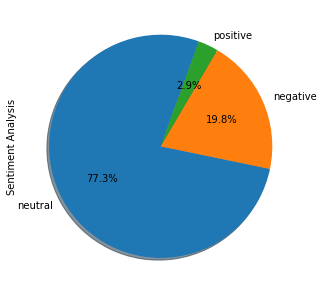

In [50]:
# Pie graph 
data_df['Sentiment Analysis'] = data_df['Sentiment Analysis'].str.lower()
data_df['Sentiment Analysis'].value_counts().plot(kind='pie', subplots=True, shadow = True,startangle=70,figsize=(5,20), autopct='%1.1f%%')

Text(0, 0.5, 'Number of tweets')

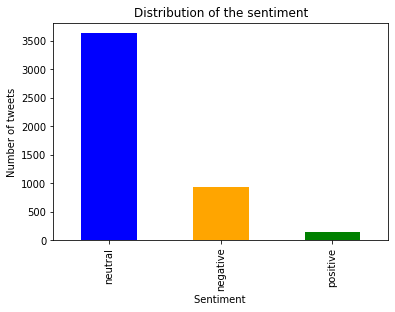

In [51]:
# bar graph 
colors= ['blue','orange','green']
data_df['Sentiment Analysis'].value_counts().plot(kind="bar", title="test",color=colors)
plt.title("Distribution of the sentiment")
plt.xlabel("Sentiment ")
plt.ylabel("Number of tweets")

In [52]:
#extract a subset of positive sentiments
Positive_df=data_df[data_df["Sentiment Analysis"]=="positive"]
Positive_df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,tweetID,tweetText,tweetRetweetCt,tweetFavoriteCt,tweetSource,tweetCreated,userID,userScreen,userName,userCreateDt,clean text,text length,Sentiment Analysis,pos_count,neg_count
134,134,134,656,1499363086267994117,باقة مفوتر 400 ما تحدّك 👌🏼,8.00000,42.00000,Twitter for Advertisers.,2022-03-03 12:36:31+00:00,14806765.00000,Mobily,موبايلي,2008-05-17 01:52:43+00:00,باقه مفوتر 400 تحد,26,positive,0,0
136,136,136,660,1499360875706294272,"@Mobily رقم ٢ \n\n@Mobily \n\n يا من يقول كُن فيكُون, إِجعل ما يتمناه قلبِي يكون .",0.00000,0.00000,Twitter for iPhone,2022-03-03 12:27:44+00:00,990207677463744384.00000,lllio98,﮼روشـا 🇸🇦,2018-04-28 12:34:42+00:00,رقم يقول فيك ون يتمناه قلب,78,positive,0,0
141,141,141,671,1499353782156775426,@Mobily @Mobily\nالقطعه رقم ٢\n. \nيـاربّ,0.00000,0.00000,Twitter for Android,2022-03-03 11:59:32+00:00,1061294468010336384.00000,M2Re10,ريم🧸,2018-11-10 16:28:13+00:00,القطعه رقم يـارب,38,positive,0,0
149,149,149,696,1499345000886419459,"@Mobily رقم ٢\n يا من يقول كُن فيكُون, إِجعل ما يتمناه قلبِي يكون.",0.00000,0.00000,Twitter for iPhone,2022-03-03 11:24:39+00:00,1021795181434228736.00000,Ii311L,🌬️ريـم,2018-07-24 16:32:10+00:00,رقم يقول فيك ون يتمناه قلب,65,positive,0,0
263,263,263,923,1499214104535388165,"@Mobily '\n\n""\n""\n""\n\nرقم 2\n\n'\n'\n'\n\nتم\n\nيا رب توفيقك\n\n""\n""\n""\n\n'",0.00000,0.00000,Twitter for iPhone,2022-03-03 02:44:31+00:00,1128838120143765632.00000,dodi_780,بدور🤍,2019-05-16 01:42:35+00:00,رقم رب توفيقك,58,positive,0,0


In [55]:
#count positive words
Positive_word = [ word for tokens in Positive_df["clean text"] for word in tokens.split()]
Positive_word_counter = Counter(Positive_word)

In [56]:
#Top 15 positive words
Positive_word_counter.most_common(15)

[('شكرا', 28),
 ('الخدمه', 14),
 ('زين', 12),
 ('حل', 11),
 ('مبايلي', 11),
 ('الموقع', 10),
 ('التجاوب', 9),
 ('بزياره', 8),
 ('الالكتروني', 8),
 ('خدمه', 8),
 ('سرعه', 8),
 ('طلب', 8),
 ('رفع', 8),
 ('شكر', 8),
 ('مقدم', 8)]

In [58]:
#extract a subset of positive sentiments
Negative_df=data_df[data_df["Sentiment Analysis"]=="negative"]
Negative_df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,tweetID,tweetText,tweetRetweetCt,tweetFavoriteCt,tweetSource,tweetCreated,userID,userScreen,userName,userCreateDt,clean text,text length,Sentiment Analysis,pos_count,neg_count
26,26,26,118,1499846437802323969,@Mobily اعلان وهمي السوشل ميديا عندهم جميع التطبيقات الا #TikTok,0.00000,0.00000,Twitter for iPhone,2022-03-04 20:37:11+00:00,2534504449.00000,w_r999,سبحان الله,2014-05-30 07:48:25+00:00,اعلان وهمي السوشل ميديا عندهم التطبيقات,64,negative,0,0
34,34,34,165,1499807215838023685,@mohammedhamadmo @mlhm_net @stc_ksa @CITC_SA @CITC_withU @ZainKSA @Mobily @McitGovSa انا صارلي ثلاث شهور ابي الغي شبكه محد يرد علي وش الهمال هذا والخدمه اسيئه هاذي,0.00000,0.00000,Twitter for iPhone,2022-03-04 18:01:19+00:00,1357384323595395072.00000,IkLQ42JmufjnRGu,اا,2021-02-04 17:43:48+00:00,صارلي شهور ابي الغي شبكه محد يرد علي وش الهمال والخدمه اسيئه هاذي,163,negative,0,0
53,53,53,285,1499699903639048192,#ملهم_بدون_نت #stc_zain_mobily وزارة الاتصالات وزير الاتصالات مايشوف ماتوصلكم شكاوينا عيب استحو,1.00000,1.00000,Twitter for iPhone,2022-03-04 10:54:54+00:00,1350909689442271232.00000,farsnjd_19,فارس نجد,2021-01-17 20:55:53+00:00,ملهم بدون نت وزاره الاتصالات وزير الاتصالات مايشوف ماتوصلكم شكاوينا عيب استحو,95,negative,0,1
60,60,60,313,1499687750974550018,@jak_a77 @mlhm_net @stc_ksa @CITC_SA @CITC_withU @ZainKSA @Mobily @McitGovSa يالغالي شكلك ما جيت ملهم ابدا شريحة زين ما تشتغل ابد في ملهم - اسال مجرب ولا تسال طبيب -,0.00000,0.00000,Twitter for iPhone,2022-03-04 10:06:37+00:00,1308780051811401728.00000,Abdulaziz_99100,عبدالعزيز 🇸🇦,2020-09-23 14:47:45+00:00,يالغالي شكلك جيت ملهم ابدا شريحه زين تشتغل ابد ملهم اسال مجرب تسال طبيب,165,negative,0,0
79,79,79,434,1499525307807805440,@realkntr @Mobily استس افضل السيئين وش حادك على موبايلي,0.00000,0.00000,Twitter for iPhone,2022-03-03 23:21:07+00:00,1339630722575949824.00000,Nawaxf0,#champions,2020-12-17 17:57:24+00:00,استس افضل السيئين وش حادك,55,negative,0,0


In [59]:
Negative_word = [ word for tokens in Negative_df["clean text"] for word in tokens.split()]
Negative_word_counter = Counter(Negative_word)

In [60]:
Negative_word_counter.most_common(15)

[('خدمه', 113),
 ('المشكله', 94),
 ('الخدمه', 82),
 ('حل', 75),
 ('العملاء', 70),
 ('شركه', 66),
 ('النت', 64),
 ('بدون', 60),
 ('وانا', 60),
 ('علي', 52),
 ('شكوي', 52),
 ('مو', 50),
 ('مشكله', 50),
 ('رقم', 50),
 ('شي', 48)]

In [61]:
#store the top 15 words in a new data frame
lst = Positive_word_counter.most_common(15)
word_df = pd.DataFrame(lst, columns = ['Words', 'Count'])

In [62]:
pip install --upgrade arabic-reshaper


In [63]:
pip install python-bidi

In [64]:
import arabic_reshaper
from bidi.algorithm import get_display

for idx,row in word_df.iterrows():
   word_df.loc[idx,'Words']=get_display(arabic_reshaper.reshape(word_df.loc[idx,'Words']))

In [65]:
#Set the DataFrame index (row labels) using existing column "Words"
word_df.set_index('Words', inplace=True)

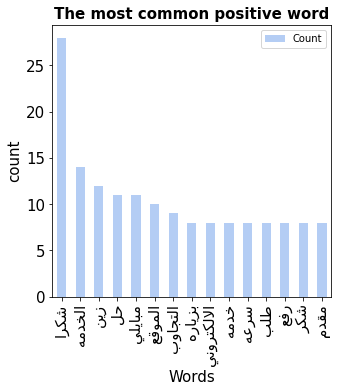

In [66]:
#set figure axis and plot it
fig,axis = plt.subplots()
axis.tick_params(axis='x', labelsize=15)
axis.tick_params(axis='y', labelsize=15)
axis.set_xlabel('Words', fontsize=15)
axis.set_ylabel('count' , fontsize=15)
axis.set_title('The most common positive word', fontsize=15, fontweight='bold')
BAR=['#b4cdf4','#b4def4','#b4ebf4']
word_df[:15].plot(ax=axis,kind='bar',figsize=(5, 5),color=BAR)
plt.savefig('word_df.png')

In [67]:
lst = Negative_word_counter.most_common(15)
word_df = pd.DataFrame(lst, columns = ['Words', 'Count'])

In [68]:
pip install --upgrade arabic-reshaper


In [69]:
pip install python-bidi

In [70]:
for idx,row in word_df.iterrows():
   word_df.loc[idx,'Words']=get_display(arabic_reshaper.reshape(word_df.loc[idx,'Words']))

In [71]:
#Set the DataFrame index (row labels) using existing column "Words"
word_df.set_index('Words', inplace=True)

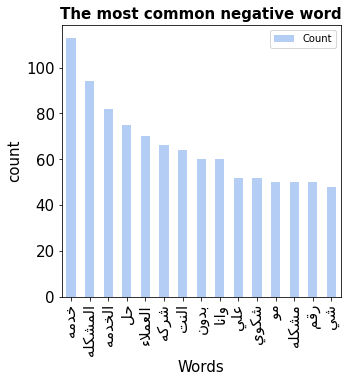

In [72]:
#set figure axis and plot it
fig,axis = plt.subplots()
axis.tick_params(axis='x', labelsize=15)
axis.tick_params(axis='y', labelsize=15)
axis.set_xlabel('Words', fontsize=15)
axis.set_ylabel('count' , fontsize=15)
axis.set_title('The most common negative word', fontsize=15, fontweight='bold')
BAR=['#b4cdf4','#b4def4','#b4ebf4']
word_df[:15].plot(ax=axis,kind='bar',figsize=(5, 5),color=BAR)
plt.savefig('word_df.png')

In [73]:
data_df[['text length','Sentiment Analysis']].groupby('Sentiment Analysis').mean()

,text length
Sentiment Analysis,
negative,129.25027
neutral,97.30932
positive,93.45985


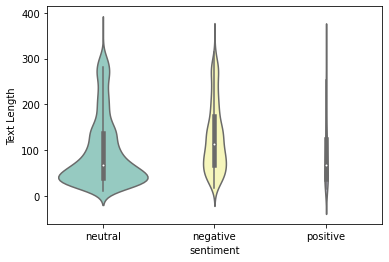

In [74]:
sb.violinplot(data= data_df, x='Sentiment Analysis', y='text length',scale='count', palette="Set3");
plt.xlabel('sentiment');
plt.ylabel('Text Length');

In [75]:
data_df.head(5)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,tweetID,tweetText,tweetRetweetCt,tweetFavoriteCt,tweetSource,tweetCreated,userID,userScreen,userName,userCreateDt,clean text,text length,Sentiment Analysis,pos_count,neg_count
0,0,0,7,1500041333347659779,"@DolezalekJosef @DrabovaDana Povodně v centru Prahy - centrum bez elektřiny, mobily jsme nabíjeli ve středisku v ZŠ na Uhelném trhu. Jistě, FVE je mnohem výhodnější - ale lidi si je musí pořídit za svý nebo na půjčku.",0.00000,0.00000,Twitter Web App,2022-03-05 09:31:37+00:00,4090104555.00000,BathoryBetka,bětka.báthory,2015-11-01 13:32:01+00:00,Povodně elektř nabí stř ZŠ Uhelné Jistě výhodnější musí poří svý půjč,217,neutral,0,0
1,1,1,12,1500038278451544064,"@calmounique مرحباً..أستاذي الكريم \n\nالآن جهاز Samsung S22 Ultra متاح للطلب المسبق عبر متجرنا الإلكتروني مع هدايا قيمة تصل قيمتها إلى 2,199 ريال.\n \nللطلب المسبق يرجى الضغط على الرابط:\nhttps://t.co/n6NgJ9xOB1\n\nنسعد بخدمتك",0.00000,0.00000,Sprinklr Publishing,2022-03-05 09:19:29+00:00,116666827.00000,Mobily1100,رعاية العملاء,2010-02-23 06:49:32+00:00,مرحبا استاذي الكريم جهاز S22 متاح للطلب المسبق عبر متجرنا الالكتروني هدايا قيمه تصل قيمتها 199 للطلب المسبق يرجي الضغط الرابط نسعد بخدمتك,221,neutral,0,0
2,2,2,14,1500032695585456129,@PetrNov95968147 Přišlo mi taky a ještě chtějí donést mobily.,0.00000,0.00000,Twitter for Android,2022-03-05 08:57:18+00:00,1317828949867712512.00000,HladkaIrena,Irena😜🐬🌸🍀,2020-10-18 14:06:19+00:00,Přiš ještě chtějí doné,61,neutral,0,0
3,3,3,25,1500006943250857984,@madgirl629 اهلاً و سهلاً\n\nللتغيير الموقع للفايبر مجاناً لاول مرة وبعدها يتم تحصيل 690 شامل الضريبة يرجى التحقق اولاً من وجود التغطية في الموقع الجديد بزيارة https://t.co/nzU30MT1Tu والتأكد من وجود البوكسية مركبة في حال وجود الشرطين يمكنك زيارة الفرع لطلب نقل الخدمة\n\nنسعد بتواصلك,0.00000,0.00000,Sprinklr Publishing,2022-03-05 07:14:58+00:00,116666827.00000,Mobily1100,رعاية العملاء,2010-02-23 06:49:32+00:00,اهلا سهلا للتغيير الموقع للفايبر مجانا لاول مره وبعدها تحصيل 690 شامل الضريبه يرجي التحقق اولا وجود التغطيه الموقع الجديد بزياره والتاكد وجود البوكسيه مركبه حال وجود الشرطين يمكنك الفرع لطلب نقل الخدمه نسعد بتواصلك,280,neutral,0,0
4,4,4,33,1499974365668069377,Na toto se čekalo. Rusko prý přijde o nové Samsung mobily a další zařízení - https://t.co/X4VrbtCSMF https://t.co/aFKvcpaq9T,0.00000,5.00000,Svět Androida autoposts,2022-03-05 05:05:31+00:00,18540811.00000,SvetAndroida,Svět Androida cz,2009-01-02 00:52:05+00:00,č prý př nové další zařízení,124,neutral,0,0


In [76]:
# change values to numeric
data_df['Sentiment Analysis'] = data_df['Sentiment Analysis'].map({'positive': 1, 'negative': 0}) 

In [77]:
# remove data with NAN stance
data_df=data_df[~data_df["Sentiment Analysis"].isna()]

In [78]:
data_df.head(5)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,tweetID,tweetText,tweetRetweetCt,tweetFavoriteCt,tweetSource,tweetCreated,userID,userScreen,userName,userCreateDt,clean text,text length,Sentiment Analysis,pos_count,neg_count
26,26,26,118,1499846437802323969,@Mobily اعلان وهمي السوشل ميديا عندهم جميع التطبيقات الا #TikTok,0.00000,0.00000,Twitter for iPhone,2022-03-04 20:37:11+00:00,2534504449.00000,w_r999,سبحان الله,2014-05-30 07:48:25+00:00,اعلان وهمي السوشل ميديا عندهم التطبيقات,64,0.00000,0,0
34,34,34,165,1499807215838023685,@mohammedhamadmo @mlhm_net @stc_ksa @CITC_SA @CITC_withU @ZainKSA @Mobily @McitGovSa انا صارلي ثلاث شهور ابي الغي شبكه محد يرد علي وش الهمال هذا والخدمه اسيئه هاذي,0.00000,0.00000,Twitter for iPhone,2022-03-04 18:01:19+00:00,1357384323595395072.00000,IkLQ42JmufjnRGu,اا,2021-02-04 17:43:48+00:00,صارلي شهور ابي الغي شبكه محد يرد علي وش الهمال والخدمه اسيئه هاذي,163,0.00000,0,0
53,53,53,285,1499699903639048192,#ملهم_بدون_نت #stc_zain_mobily وزارة الاتصالات وزير الاتصالات مايشوف ماتوصلكم شكاوينا عيب استحو,1.00000,1.00000,Twitter for iPhone,2022-03-04 10:54:54+00:00,1350909689442271232.00000,farsnjd_19,فارس نجد,2021-01-17 20:55:53+00:00,ملهم بدون نت وزاره الاتصالات وزير الاتصالات مايشوف ماتوصلكم شكاوينا عيب استحو,95,0.00000,0,1
60,60,60,313,1499687750974550018,@jak_a77 @mlhm_net @stc_ksa @CITC_SA @CITC_withU @ZainKSA @Mobily @McitGovSa يالغالي شكلك ما جيت ملهم ابدا شريحة زين ما تشتغل ابد في ملهم - اسال مجرب ولا تسال طبيب -,0.00000,0.00000,Twitter for iPhone,2022-03-04 10:06:37+00:00,1308780051811401728.00000,Abdulaziz_99100,عبدالعزيز 🇸🇦,2020-09-23 14:47:45+00:00,يالغالي شكلك جيت ملهم ابدا شريحه زين تشتغل ابد ملهم اسال مجرب تسال طبيب,165,0.00000,0,0
79,79,79,434,1499525307807805440,@realkntr @Mobily استس افضل السيئين وش حادك على موبايلي,0.00000,0.00000,Twitter for iPhone,2022-03-03 23:21:07+00:00,1339630722575949824.00000,Nawaxf0,#champions,2020-12-17 17:57:24+00:00,استس افضل السيئين وش حادك,55,0.00000,0,0


In [79]:
# idneitfy the data and the labels
data= data_df['clean text']
target= data_df['Sentiment Analysis']

In [80]:
# Use TfidfVectorizer for feature extraction (TFIDF to convert textual data to numeric form):
tf_vec = TfidfVectorizer()
X = tf_vec.fit_transform(data)
X.shape

(1068, 5798)

In [81]:
# Training Phase
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.30, random_state=0)

In [82]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(747, 5798) (321, 5798) (747,) (321,)


# Classifier 1: Naive Bayes

In [83]:
# create the classifer and fit the training data and lables
classifier_nb = MultinomialNB().fit(X_train.todense(),y_train)

print("MultinomialNB accuracy: %.2f"%classifier_nb.score(X_test.todense(), y_test))

#do a 10 fold cross-validation 
results_nb = cross_val_score(classifier_nb, X.todense(),target, cv=10)
print("\n10-fold cross-validation:")
print(results_nb)

print("The average accuracy of the MultinomialNB classifier is : %.2f" % np.mean(results_nb))

print("\nConfusion matrix of the MultinomialNB classifier:")
predicted_nb = classifier_nb.predict(X_test.todense())
print(confusion_matrix(y_test,predicted_nb))


print("\nClassification_report of MultinomialNB classifier:")
print(classification_report(y_test,predicted_nb))
print("----------------------------------------------------------------------------")

MultinomialNB accuracy: 0.90


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.


10-fold cross-validation:
[0.87850467 0.87850467 0.86915888 0.86915888 0.86915888 0.89719626
 0.88785047 0.88785047 0.90566038 0.87735849]
The average accuracy of the MultinomialNB classifier is : 0.88

Confusion matrix of the MultinomialNB classifier:
[[286   0]
 [ 32   3]]

Classification_report of MultinomialNB classifier:
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95       286
         1.0       1.00      0.09      0.16        35

    accuracy                           0.90       321
   macro avg       0.95      0.54      0.55       321
weighted avg       0.91      0.90      0.86       321

----------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



In [84]:
# calculate the fpr and tpr for all thresholds of the classification
probs = classifier_nb.predict_proba(X_test)
preds = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

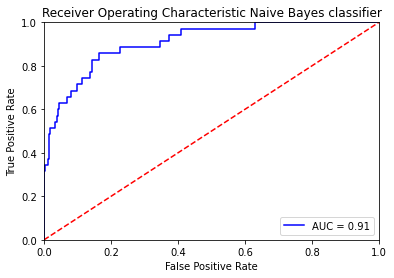

In [85]:
# polt the AUC
plt.title('Receiver Operating Characteristic Naive Bayes classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Classifier 2: Logistic Regression

In [86]:
# build the second classifer, logsitic regrssion 
classifier_log =  LogisticRegression().fit(X_train,y_train)

In [87]:
print("Logisitic Accuracy: %.2F"%classifier_log.score(X_test, y_test))
results_log = cross_val_score(classifier_log, X,target, cv=10)


print("\n10-fold cross-validation:")
print(results_log)


print("The average accuracy of the Logisitic classifier is : %.2f" % np.mean(results_log))
print("\nConfusion matrix of the Logisitic classifier:")
predicted_log= classifier_log.predict(X_test)
print(confusion_matrix(y_test,predicted_log))


print("\nClassification_report of Logisitic classifier:")
print(classification_report(y_test,predicted_log))
print("----------------------------------------------------------------------------")

Logisitic Accuracy: 0.90

10-fold cross-validation:
[0.87850467 0.87850467 0.85981308 0.86915888 0.86915888 0.86915888
 0.91588785 0.89719626 0.90566038 0.88679245]
The average accuracy of the Logisitic classifier is : 0.88

Confusion matrix of the Logisitic classifier:
[[286   0]
 [ 32   3]]

Classification_report of Logisitic classifier:
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95       286
         1.0       1.00      0.09      0.16        35

    accuracy                           0.90       321
   macro avg       0.95      0.54      0.55       321
weighted avg       0.91      0.90      0.86       321

----------------------------------------------------------------------------


In [88]:
# calculate the fpr and tpr for all thresholds of the classification

probs = classifier_log.predict_proba(X_test)
preds = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

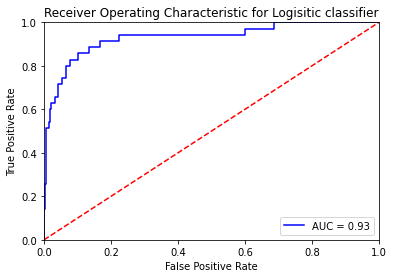

In [89]:
# polt AUC
plt.title('Receiver Operating Characteristic for Logisitic classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [90]:
data_df.head(5)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,tweetID,tweetText,tweetRetweetCt,tweetFavoriteCt,tweetSource,tweetCreated,userID,userScreen,userName,userCreateDt,clean text,text length,Sentiment Analysis,pos_count,neg_count
26,26,26,118,1499846437802323969,@Mobily اعلان وهمي السوشل ميديا عندهم جميع التطبيقات الا #TikTok,0.00000,0.00000,Twitter for iPhone,2022-03-04 20:37:11+00:00,2534504449.00000,w_r999,سبحان الله,2014-05-30 07:48:25+00:00,اعلان وهمي السوشل ميديا عندهم التطبيقات,64,0.00000,0,0
34,34,34,165,1499807215838023685,@mohammedhamadmo @mlhm_net @stc_ksa @CITC_SA @CITC_withU @ZainKSA @Mobily @McitGovSa انا صارلي ثلاث شهور ابي الغي شبكه محد يرد علي وش الهمال هذا والخدمه اسيئه هاذي,0.00000,0.00000,Twitter for iPhone,2022-03-04 18:01:19+00:00,1357384323595395072.00000,IkLQ42JmufjnRGu,اا,2021-02-04 17:43:48+00:00,صارلي شهور ابي الغي شبكه محد يرد علي وش الهمال والخدمه اسيئه هاذي,163,0.00000,0,0
53,53,53,285,1499699903639048192,#ملهم_بدون_نت #stc_zain_mobily وزارة الاتصالات وزير الاتصالات مايشوف ماتوصلكم شكاوينا عيب استحو,1.00000,1.00000,Twitter for iPhone,2022-03-04 10:54:54+00:00,1350909689442271232.00000,farsnjd_19,فارس نجد,2021-01-17 20:55:53+00:00,ملهم بدون نت وزاره الاتصالات وزير الاتصالات مايشوف ماتوصلكم شكاوينا عيب استحو,95,0.00000,0,1
60,60,60,313,1499687750974550018,@jak_a77 @mlhm_net @stc_ksa @CITC_SA @CITC_withU @ZainKSA @Mobily @McitGovSa يالغالي شكلك ما جيت ملهم ابدا شريحة زين ما تشتغل ابد في ملهم - اسال مجرب ولا تسال طبيب -,0.00000,0.00000,Twitter for iPhone,2022-03-04 10:06:37+00:00,1308780051811401728.00000,Abdulaziz_99100,عبدالعزيز 🇸🇦,2020-09-23 14:47:45+00:00,يالغالي شكلك جيت ملهم ابدا شريحه زين تشتغل ابد ملهم اسال مجرب تسال طبيب,165,0.00000,0,0
79,79,79,434,1499525307807805440,@realkntr @Mobily استس افضل السيئين وش حادك على موبايلي,0.00000,0.00000,Twitter for iPhone,2022-03-03 23:21:07+00:00,1339630722575949824.00000,Nawaxf0,#champions,2020-12-17 17:57:24+00:00,استس افضل السيئين وش حادك,55,0.00000,0,0
